# Analyzing Ford [GoBike System](https://s3.amazonaws.com/fordgobike-data/index.html) Data

<span style="color: gray; font-size:1em;">Mateusz Zajac</span>
<br><span style="color: gray; font-size:1em;">Feb-2019</span>


## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering Data](#gather)
- [Part II - Assessing Data](#assess)
- [Part III - Cleaning Data](#clean)
- [Part IV - Analyzing Data](#analysis)

<a id='intro'></a>
### Introduction

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.
<br>
<br>Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

### Preliminary Wrangling

This document explores the Ford GoBike's trip data for public containing approximately 185,000 bike rides from FY2018.

<a id='gather'></a>
#### Part I - Gathering Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import glob
import os

%matplotlib inline

>**path to the folder where all files has been stored**
<br>path =r'...\Udacity Projects\project_4-communicate_data_findings\Ford_GoBike_System_Data_201801-201901'

>**store list of all file locations**
<br>all_files = glob.glob(os.path.join(path, "*.csv"))

>**load and union the dataset**
<br>df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index = True)

>**write newly loaded data**
<br>df.to_csv('master_file.csv', index=False)

In [2]:
# load the dataset
df = pd.read_csv('master_file.csv')

<a id='assess'></a>
### Part II - Assessing  Data

In [3]:
# Visually check first 5 records
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [4]:
# Visually check 50 random records
df.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
115552,850,2018-02-22 17:49:49.8040,2018-02-22 18:04:00.2880,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,720,Subscriber,1993.0,Male,No
1712153,302,2018-11-04 13:23:25.0250,2018-11-04 13:28:27.6010,109.0,17th St at Valencia St,37.763316,-122.421904,133.0,Valencia St at 22nd St,37.755213,-122.420975,91,Subscriber,1989.0,Male,No
886872,477,2018-07-21 14:31:42.4560,2018-07-21 14:39:39.6530,100.0,Bryant St at 15th St,37.767100,-122.410662,66.0,3rd St at Townsend St,37.778742,-122.392741,2054,Subscriber,1992.0,Male,No
612746,762,2018-05-02 16:03:04.3890,2018-05-02 16:15:47.2060,321.0,5th at Folsom,37.780146,-122.403071,95.0,Sanchez St at 15th St,37.766219,-122.431060,3960,Subscriber,1982.0,Male,No
529644,1708,2018-05-16 18:34:49.4480,2018-05-16 19:03:17.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,25.0,Howard St at 2nd St,37.787522,-122.397405,3452,Subscriber,1994.0,Female,No
410792,639,2018-04-09 18:14:12.2880,2018-04-09 18:24:51.5890,81.0,Berry St at 4th St,37.775880,-122.393170,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3444,Subscriber,1985.0,Male,No
627651,1598,2018-06-29 21:55:56.7550,2018-06-29 22:22:35.2530,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,242.0,Milvia St at Derby St,37.860125,-122.269384,1637,Subscriber,1976.0,Female,Yes
1610774,532,2018-11-28 14:06:15.5790,2018-11-28 14:15:07.6670,321.0,5th St at Folsom,37.780146,-122.403071,19.0,Post St at Kearny St,37.788975,-122.403452,2692,Subscriber,1984.0,Female,No
753788,86,2018-06-11 17:51:30.2520,2018-06-11 17:52:57.0290,337.0,Webster St at 19th St,37.806970,-122.266588,182.0,19th Street BART Station,37.809013,-122.268247,1344,Subscriber,1989.0,Male,No
1046028,369,2018-08-27 21:24:23.6450,2018-08-27 21:30:32.8930,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,343.0,Bryant St at 2nd St,37.783172,-122.393572,1735,Subscriber,1966.0,Male,No


In [5]:
# View info of the dataframe
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null object
end_time                   1863721 non-null object
start_station_id           1851950 non-null float64
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1851950 non-null float64
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null int64
user_type                  1863721 non-null object
member_birth_year          1753003 non-null float64
member_gender              1753354 non-null object
bike_share_for_all_trip    1863721 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [6]:
# Check if duplicates exist
df.duplicated().sum()

0

In [7]:
# View descriptive statistics of the dataframe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


<a id='issues'></a>
**Quality issues**
 * start time and end time are objects not a timestamps
 * user type, gender and bike_share_for_all_trip can be set to category
 * bike id, start_station_id, end_station_id can be set to object
 * member birth year has dates prior to 1900
 * we can calculate the age of the user
 * we can further enhance the dataset with more details about the time like month, day, hour, weekday
 * we can calculate the distance for rides between stations

<a id='clean'></a>
### Part III - Cleaning Data

In [8]:
# Create copies of original DataFrames
df_clean = df.copy()

**Define**
<br>Set appropriate data types for fields mentioned in the [Quality issues](#issues)

**Code**

In [9]:
# set dates to timestamps
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [10]:
# set user type, gender and bike_share_for_all_trip to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [11]:
# set bike id, start_station_id, end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)

**Test**

In [12]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null datetime64[ns]
end_time                   1863721 non-null datetime64[ns]
start_station_id           1863721 non-null object
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1863721 non-null object
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null object
user_type                  1863721 non-null category
member_birth_year          1753003 non-null float64
member_gender              1753354 non-null category
bike_share_for_all_trip    1863721 non-null category
dtypes: category(3), datetime64[ns](2), float

**Define**
<br>Calculate the age of the member

**Code**

In [13]:
# substract the birth year from the current year
df_clean['member_age'] = 2019-df_clean['member_birth_year']

**Test**

In [14]:
df_clean.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Mission Dolores Park,37.761420,-122.426435,2765,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,33.0
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,NaN
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Jackson St at 5th St,37.348759,-121.894798,3039,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,23.0
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,321,Market St at Franklin St,37.773793,-122.421239,321,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No,NaN
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Laguna St at Hayes St,37.776435,-122.426244,617,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,28.0
5,6477,2018-01-31 22:58:44.867,2018-02-01 00:46:41.908,1306,Market St at 8th St,37.803686,-122.282497,1306,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No,NaN
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,3571,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,3571,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No,31.0
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,1403,Berry St at 4th St,37.775880,-122.393170,1403,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No,39.0
8,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,3675,Valencia St at 24th St,37.752428,-122.420628,3675,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes,32.0
9,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,1453,Ryland Park,37.342725,-121.895617,1453,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes,25.0


**Define**
<br>Enhance dataset with new date related fields

**Code**

In [15]:
# extract YM for the time baseline
df_clean['start_time_YM'] = df_clean['start_time'].dt.strftime('%Y' + '-' + '%m')

In [16]:
# extract month
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)
df_clean['end_time_month']=df_clean['end_time'].dt.month.astype(int)

In [17]:
# extract day
df_clean['start_time_day']=df_clean['start_time'].dt.day.astype(int)
df_clean['end_time_day']=df_clean['end_time'].dt.day.astype(int)

In [18]:
# extract hour
df_clean['start_time_hour']=df_clean['start_time'].dt.hour
df_clean['end_time_hour']=df_clean['end_time'].dt.hour

In [19]:
# extract weekdays
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')
df_clean['end_time_weekday']=df_clean['end_time'].dt.strftime('%a')

**Test**

In [20]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_age,start_time_YM,start_time_month,end_time_month,start_time_day,end_time_day,start_time_hour,end_time_hour,start_time_weekday,end_time_weekday
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Mission Dolores Park,37.761420,-122.426435,2765,Webster St at O'Farrell St,37.783521,...,33.0,2018-01,1,2,31,1,22,19,Wed,Thu
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,NaN,2018-01,1,2,31,1,16,15,Wed,Thu
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Jackson St at 5th St,37.348759,-121.894798,3039,5th St at Virginia St,37.325998,...,23.0,2018-01,1,2,31,1,14,10,Wed,Thu
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,321,Market St at Franklin St,37.773793,-122.421239,321,4th St at Harrison St,37.780955,...,NaN,2018-01,1,2,31,1,14,7,Wed,Thu
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Laguna St at Hayes St,37.776435,-122.426244,617,Post St at Kearny St,37.788975,...,28.0,2018-01,1,2,31,1,19,6,Wed,Thu


In [21]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 26 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null datetime64[ns]
end_time                   1863721 non-null datetime64[ns]
start_station_id           1863721 non-null object
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1863721 non-null object
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null object
user_type                  1863721 non-null category
member_birth_year          1753003 non-null float64
member_gender              1753354 non-null category
bike_share_for_all_trip    1863721 non-null category
member_age                 1753003 non-null f

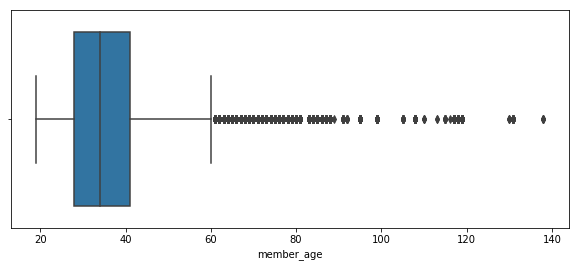

In [22]:
# code for the age boxplot

plt.figure(figsize = [10, 4])
base_color = sns.color_palette()[0]

sns.boxplot(data=df_clean, x='member_age', color=base_color);

In [23]:
df_clean.member_age.mean()

35.91203780027758

In [24]:
df_clean.member_age.describe(percentiles = [ .95])

count    1.753003e+06
mean     3.591204e+01
std      1.044289e+01
min      1.900000e+01
50%      3.400000e+01
95%      5.700000e+01
max      1.380000e+02
Name: member_age, dtype: float64

**Define**
<br>Remove age outliers. As mentioned in the [Quality issues](#issues), there are customers with the birth year before 1900 thus customers with age above 100 years. As 95% of the users are below 58 , I am going to keep users below 60.

**Code**

In [25]:
# Keep records below 60, it automatically removes null values
df_clean = df_clean.query('member_age <=60')

In [26]:
# change age and birth year to integer
df_clean.member_age = df_clean.member_age.astype(int)
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

**Test**

In [27]:
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age,start_time_month,end_time_month,start_time_day,end_time_day,start_time_hour,end_time_hour
count,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06,1.708250e+06
mean,7.770344e+02,3.776626e+01,-1.223483e+02,3.776635e+01,-1.223477e+02,1.983908e+03,3.509174e+01,6.985020e+00,6.985005e+00,1.572093e+01,1.572073e+01,1.351124e+01,1.366716e+01
std,1.985384e+03,1.068892e-01,1.695276e-01,1.067575e-01,1.691045e-01,9.114289e+00,9.114289e+00,3.112264e+00,3.112292e+00,8.782700e+00,8.782753e+00,4.769725e+00,4.790295e+00
min,6.100000e+01,3.726331e+01,-1.224737e+02,3.726331e+01,-1.224737e+02,1.959000e+03,1.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.450000e+02,3.777041e+01,-1.224114e+02,3.777106e+01,-1.224094e+02,1.979000e+03,2.800000e+01,5.000000e+00,5.000000e+00,8.000000e+00,8.000000e+00,9.000000e+00,9.000000e+00
50%,5.430000e+02,3.778107e+01,-1.223971e+02,3.778107e+01,-1.223959e+02,1.986000e+03,3.300000e+01,7.000000e+00,7.000000e+00,1.600000e+01,1.600000e+01,1.400000e+01,1.400000e+01
75%,8.400000e+02,3.779581e+01,-1.222831e+02,3.779625e+01,-1.222876e+02,1.991000e+03,4.000000e+01,1.000000e+01,1.000000e+01,2.300000e+01,2.300000e+01,1.700000e+01,1.800000e+01
max,8.628100e+04,4.551000e+01,-7.357000e+01,4.551000e+01,-7.357000e+01,2.000000e+03,6.000000e+01,1.200000e+01,1.200000e+01,3.100000e+01,3.100000e+01,2.300000e+01,2.300000e+01


In [28]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708250 entries, 0 to 1863719
Data columns (total 26 columns):
duration_sec               1708250 non-null int64
start_time                 1708250 non-null datetime64[ns]
end_time                   1708250 non-null datetime64[ns]
start_station_id           1708250 non-null object
start_station_name         1696859 non-null object
start_station_latitude     1708250 non-null float64
start_station_longitude    1708250 non-null float64
end_station_id             1708250 non-null object
end_station_name           1696859 non-null object
end_station_latitude       1708250 non-null float64
end_station_longitude      1708250 non-null float64
bike_id                    1708250 non-null object
user_type                  1708250 non-null category
member_birth_year          1708250 non-null int32
member_gender              1708250 non-null category
bike_share_for_all_trip    1708250 non-null category
member_age                 1708250 non-null int

### What is the structure of your dataset?

Originally there were approx. 185,000 bike rides that happen in 2018 in the San Francisco Bay Area. The dataset contained features about:
 * trip duration: start/end time, how long the trip took in seconds
 * stations: start/end station, name, geolocation (latitude/longitude)
 * anonymized customer data: gender, birth date and user type
 * rented bikes: bike id

The dataset was further enhanced with features that I may find neccessary to perform interesting analysis:
 * rental time: month, day, hour of the day, weekday (both for start and end date)
 * customer: age

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out when and where bikes are high in demand (during the day/weekday/month). Moreover which age range and gender uses the service the most and if the service is mostly used by members or casual riders.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the start time will be most exploited in my analysis as well as customer related data. I expect that location and datetime will have the strongest effect on bike demand.


## Univariate Exploration

I'll start by looking at the monthly trend of number of bike rentals and distribution of weekdays and hours of the day per customer type.

In [29]:
# calculating % split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_clean['bike_id'].count()
subscriber_proportion = subscriber / df_clean['bike_id'].count()

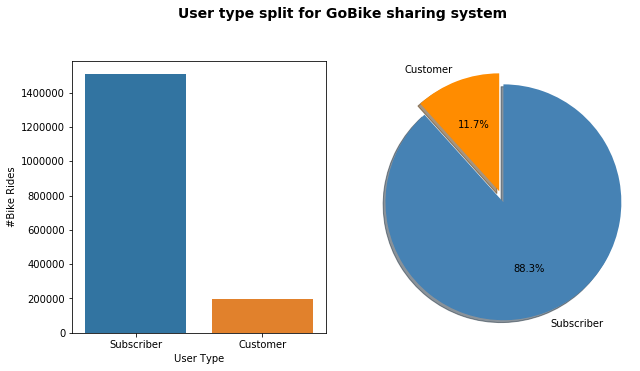

In [30]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Rides')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');

> * The system is mainly used by subscribers (alomost 90%) than ocassional riders.
* Next I am going to explore the renting trends per each user type

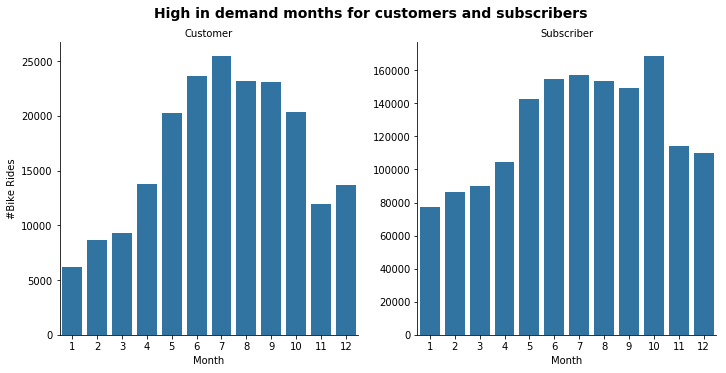

In [31]:
# monthly usege of the bike sharing system per user type
g = sns.catplot(data=df_clean, x='start_time_month', col="user_type", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Month", "#Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('High in demand months for customers and subscribers', y=1.03, fontsize=14, fontweight='semibold');

> Winter months are the worst for the bike sharing system for both groups what can be determined by the harsher weather.
<br>
<br>For **Customers,** the bike renting is high in demand around summertime, reaching its peak in July. Customers are most probably occasional reiders or tourist coming to visit the Bay Area. For **Subscribers,** the highest demand is from May till October, reaching it's peak in October. Customers are most probably regular riders using bikes for a daily commute.

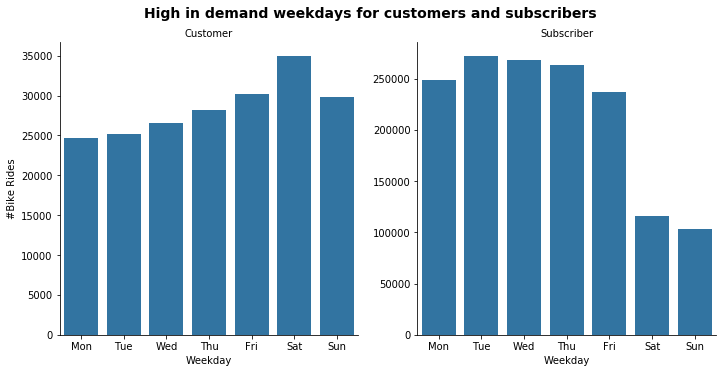

In [32]:
# weekday usege of the bike sharing system per user type

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False,
            color = base_color, order = weekday)
g.set_axis_labels("Weekday", "#Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('High in demand weekdays for customers and subscribers', y=1.03, fontsize=14, fontweight='semibold');

> There is a different trend on which days customers and subscribers rent bikes. As mentioned above **customers** are most probably occasional riders and tourist who use the bike sharing system on holiday or weekend trips. On the other hand, **subscribers** are most probably daily work/school commuters who use the system within a week.
<br>
<br>Next, I am going to check when within a day bikes are high in demand.

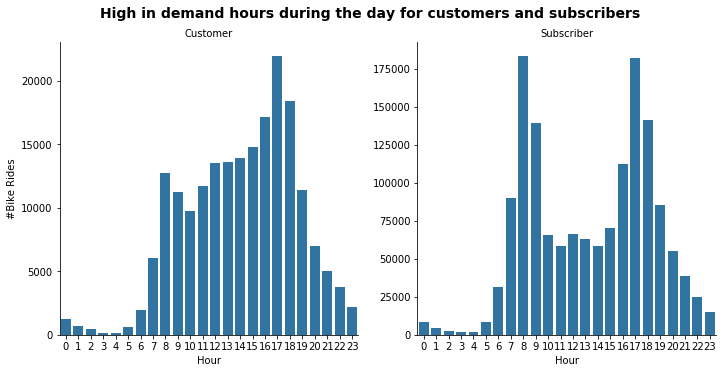

In [33]:
# hourly usege of the bike sharing system per user type

g = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Hour", "#Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('High in demand hours during the day for customers and subscribers', y=1.03, fontsize=14, fontweight='semibold');

> There is also a different trend of when during the day bikes are rented most often. **Customers** use bikes mainly between 8 am - 7 pm, reaching the renting peak around 5pm. **Subscribers** on the other side use the system at around 8-9am and 5-6pm when they go and come back from work.
<br>
<br>Next, I am going to check how the trip duration varies between customers and subscribers.

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


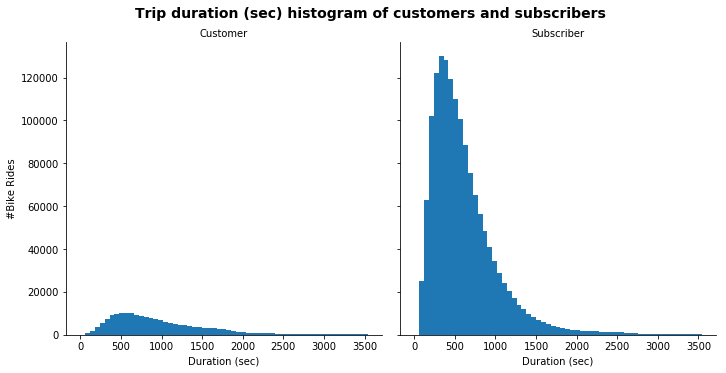

In [34]:
# code for the (histogram) duration (sec) distribution per user type

g = sns.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Rides")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) histogram of customers and subscribers', y=1.03, fontsize=14, fontweight='semibold');


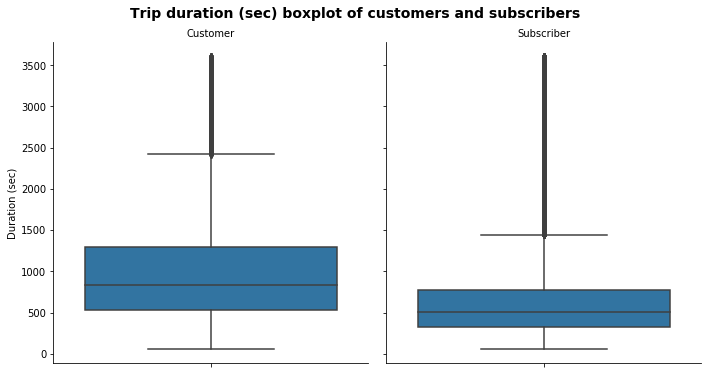

In [35]:
# code for the (boxplot) duration (sec) distribution per user type

data = df_clean.query('duration_sec < 3600')
g = sns.catplot(data=data, y='duration_sec', col="user_type", kind='box',
            color = base_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (sec)")
g.fig.suptitle('Trip duration (sec) boxplot of customers and subscribers', y=1.03, fontsize=14, fontweight='semibold');

> Looking at both charts (histograms and box plots), we can see that trip durations are longer for customers (9 to 23 minutes) than for subscribers (7 to 13 minutes). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area. Moreover, trips above 30 min (1800 sec) are less popular, most probably due to the fact that single trips and 24h or 72h access pass are free of additional charge for trips up to 30 min, otherwise you pay extra $3 for additional 15 min. Only the monthly pass offers free of charge 45 min rides.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was one unusal points for the duration (sec), which in some cases lasted more than 24h. For the histogram I set the max range to 3600 sec = 60 min. For the boxplot I queried the data with the duration =< 3600 sec.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was one unusal distribution for the member birth year, which in some cases was dated before 1900. Since 95% of the members are between 17 and 57 years, I removed users older than 60.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

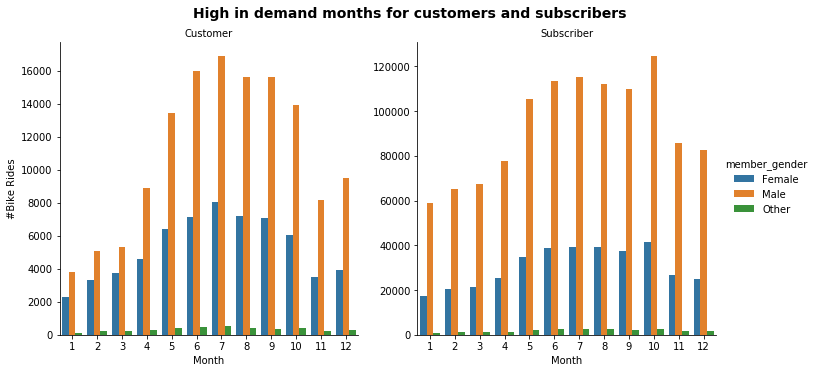

In [48]:
# monthly usege of the bike sharing system per user type

g = sns.catplot(data=df_clean, x='start_time_month', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Month", "#Bike Rides")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('High in demand months for customers and subscribers', y=1.03, fontsize=14, fontweight='semibold');

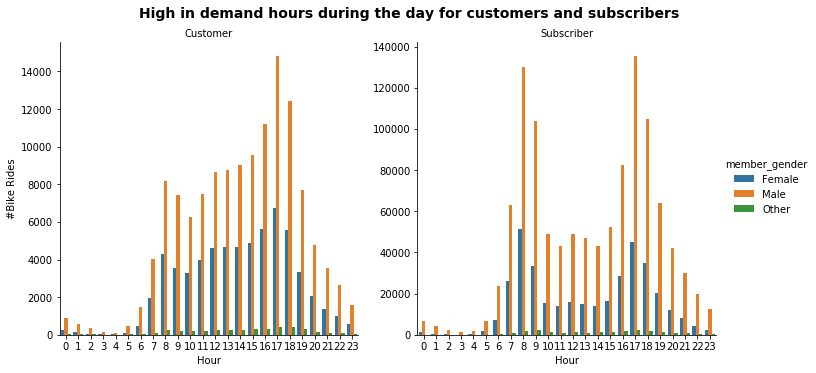

In [49]:
# hourly usege of the bike sharing system per user type

g = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", hue='member_gender', kind='count', sharey = False)
g.set_axis_labels("Hour", "#Bike Rides")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('High in demand hours during the day for customers and subscribers', y=1.03, fontsize=14, fontweight='semibold');

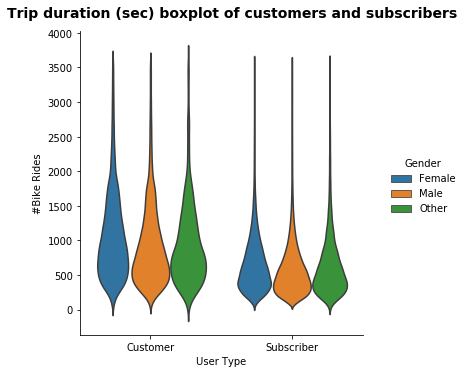

In [80]:
# code for the (violinplot) duration (sec) distribution per user type

g = sns.catplot(data=data, x='user_type', y="duration_sec", hue="member_gender", kind="violin", inner=None)

g.set_axis_labels("User Type", "Trip duration (sec)")
g._legend.set_title('Gender')
g.fig.suptitle('Trip duration of customers and subscribers', y=1.03, fontsize=14, fontweight='semibold');

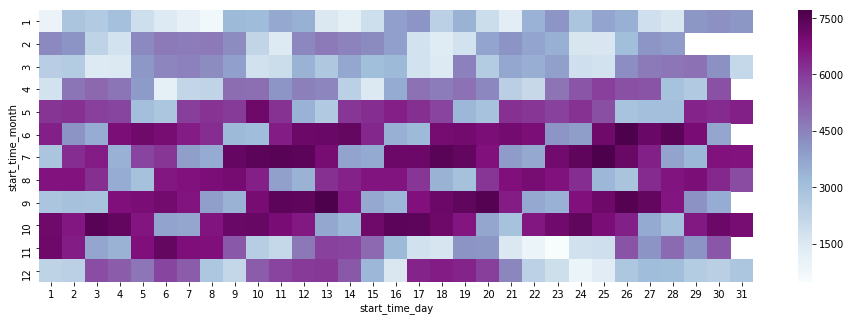

In [42]:
# Getting unique values after grouping by month and date
df_new = df_clean.groupby(["start_time_month", "start_time_day"])["bike_id"].size()
df_new = df_new.reset_index(name="count")
plt.figure(figsize = (16,5))
# Pivot the dataframe to create a [month x date] matrix containing counts
sns.heatmap(df_new.pivot("start_time_month", "start_time_day", "count"), annot=False, cmap="BuPu");

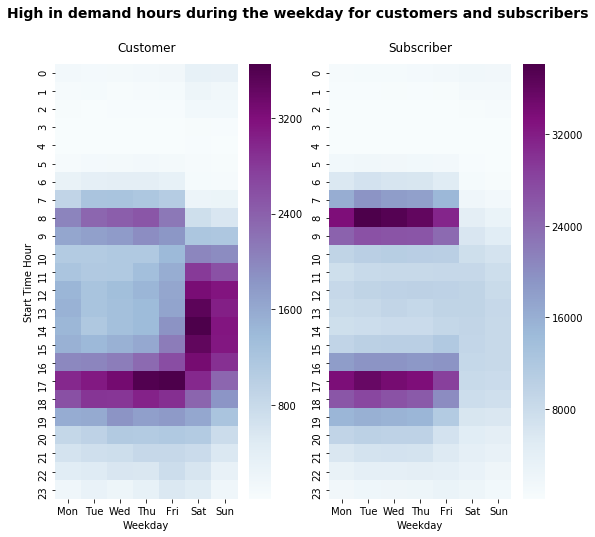

In [76]:
# Setting the weekday order
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('High in demand hours during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!